# Caso Univariado: Aproximación de Función de Fourier
## Análisis Completo con Polinomios de Bernstein-Newton

Este notebook desarrolla un ejemplo completo del caso univariado usando una función de Fourier como prueba.

## 1. Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.linalg import solve
from scipy.interpolate import BarycentricInterpolator
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.style.use('seaborn-v0_8-darkgrid')

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Definir la Función de Fourier

La función de prueba es una combinación de 5 armónicos:

$$f(x) = \sum_{k=1}^{5} \frac{1}{k} \sin(2\pi kx) + \frac{1}{2k} \cos(4\pi kx)$$

Esta es una función suave y oscilatoria en el intervalo $[0, 1]$.

In [3]:
def fourier_wave(x):
    """
    Serie de Fourier: onda modulada con 5 armónicos
    
    f(x) = Σ_{k=1}^5 (1/k) sin(2πkx) + (1/2k) cos(4πkx)
    
    Parameters:
    -----------
    x : array-like
        Puntos en [0, 1]
    
    Returns:
    --------
    f : array
        Valores de la función en los puntos x
    """
    f = np.zeros_like(x, dtype=float)
    
    for k in range(1, 6):
        f += (1/k) * np.sin(2 * np.pi * k * x)
        f += (1/(2*k)) * np.cos(4 * np.pi * k * x)
    
    return f

def fourier_wave_derivative(x):
    """
    Derivada de la serie de Fourier
    
    f'(x) = Σ_{k=1}^5 2π k * (1/k) cos(2πkx) - 4π k * (1/2k) sin(4πkx)
          = Σ_{k=1}^5 2π cos(2πkx) - 2π sin(4πkx)
    """
    f_prime = np.zeros_like(x, dtype=float)
    
    for k in range(1, 6):
        f_prime += 2 * np.pi * np.cos(2 * np.pi * k * x)
        f_prime -= 2 * np.pi * np.sin(4 * np.pi * k * x)
    
    return f_prime

# Verificar la función
x_test = np.array([0, 0.25, 0.5, 0.75, 1.0])
f_test = fourier_wave(x_test)
print("Valores de prueba de f(x):")
for xi, fi in zip(x_test, f_test):
    print(f"  f({xi:.2f}) = {fi:.6f}")

Valores de prueba de f(x):
  f(0.00) = 1.141667
  f(0.25) = 0.475000
  f(0.50) = 1.141667
  f(0.75) = -1.258333
  f(1.00) = 1.141667


## 3. Visualizar la Función de Prueba

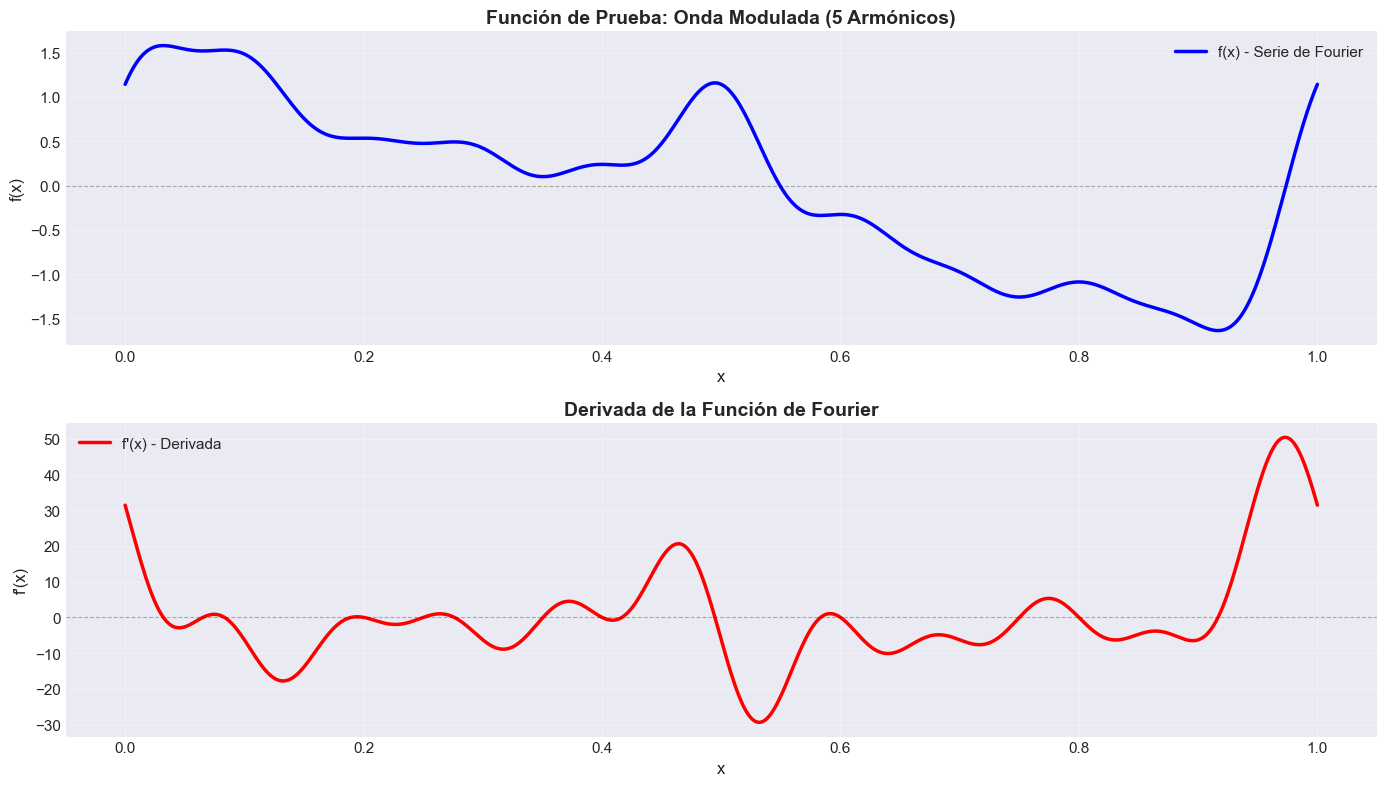


ESTADÍSTICAS DE LA FUNCIÓN
Rango de valores: [-1.636998, 1.579072]
Amplitud pico-pico: 3.216069
Media: 0.001142
Desviación estándar: 0.956632

Derivada - Rango: [-29.375989, 50.407247]
Derivada - Media: 0.031416



In [12]:
# Visualizar la función
x_plot = np.linspace(0, 1, 1000)
f_plot = fourier_wave(x_plot)
f_prime_plot = fourier_wave_derivative(x_plot)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Función
axes[0].plot(x_plot, f_plot, 'b-', linewidth=2.5, label='f(x) - Serie de Fourier')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('Función de Prueba: Onda Modulada (5 Armónicos)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=0.8)

# Derivada
axes[1].plot(x_plot, f_prime_plot, 'r-', linewidth=2.5, label="f'(x) - Derivada")
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel("f'(x)", fontsize=12)
axes[1].set_title("Derivada de la Función de Fourier", fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=0.8)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ESTADÍSTICAS DE LA FUNCIÓN")
print(f"{'='*60}")
print(f"Rango de valores: [{f_plot.min():.6f}, {f_plot.max():.6f}]")
print(f"Amplitud pico-pico: {f_plot.max() - f_plot.min():.6f}")
print(f"Media: {np.mean(f_plot):.6f}")
print(f"Desviación estándar: {np.std(f_plot):.6f}")
print(f"\nDerivada - Rango: [{f_prime_plot.min():.6f}, {f_prime_plot.max():.6f}]")
print(f"Derivada - Media: {np.mean(f_prime_plot):.6f}")
print(f"{'='*60}\n")

## 4. Generar Datos de Prueba

Crear puntos de muestra evaluando la función de Fourier en ubicaciones discretas, con opción de agregar ruido.

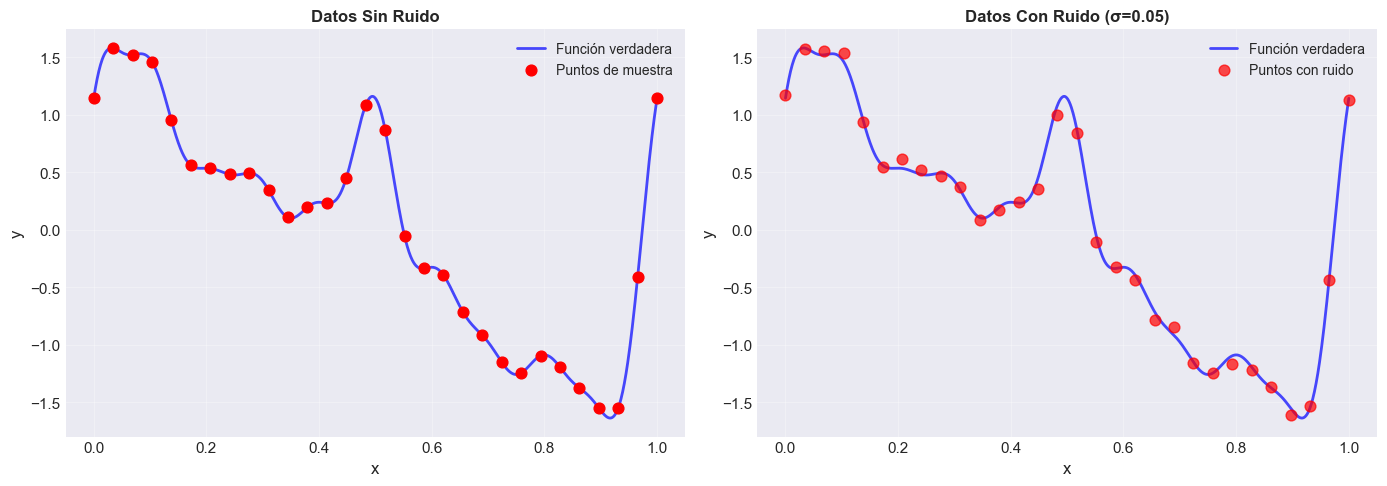

Número de puntos de muestra: 30
Rango de x: [0.0000, 1.0000]
Rango de y (sin ruido): [-1.5494, 1.5778]
Rango de y (con ruido): [-1.6067, 1.5709]
Error de ruido (STD): 0.044244


In [13]:
# Generar puntos de datos sin ruido primero
n_samples = 30
x_data = np.linspace(0, 1, n_samples)
y_data_clean = fourier_wave(x_data)

# Agregar ruido gaussiano (opcional)
noise_level = 0.05
np.random.seed(42)
noise = np.random.normal(0, noise_level, n_samples)
y_data_noisy = y_data_clean + noise

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Datos sin ruido
axes[0].plot(x_plot, f_plot, 'b-', linewidth=2, label='Función verdadera', alpha=0.7)
axes[0].scatter(x_data, y_data_clean, color='red', s=60, zorder=5, label='Puntos de muestra')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Datos Sin Ruido', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)

# Datos con ruido
axes[1].plot(x_plot, f_plot, 'b-', linewidth=2, label='Función verdadera', alpha=0.7)
axes[1].scatter(x_data, y_data_noisy, color='red', s=60, zorder=5, label='Puntos con ruido', alpha=0.7)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title(f'Datos Con Ruido (σ={noise_level})', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"Número de puntos de muestra: {n_samples}")
print(f"Rango de x: [{x_data.min():.4f}, {x_data.max():.4f}]")
print(f"Rango de y (sin ruido): [{y_data_clean.min():.4f}, {y_data_clean.max():.4f}]")
print(f"Rango de y (con ruido): [{y_data_noisy.min():.4f}, {y_data_noisy.max():.4f}]")
print(f"Error de ruido (STD): {np.std(noise):.6f}")

## 5. Implementar Ajuste Polinomial

Función auxiliar para ajuste de polinomios mediante mínimos cuadrados.

In [17]:
# Probar con diferentes grados
print("Ajustando polinomios de diferentes grados...\n")

degrees = [3, 5, 7, 10, 15, 20, 50, 100, 200, 500, 1000]
fits = {}

for degree in degrees:
    coeffs, residual = fit_polynomial(x_data, y_data_clean, degree)
    fits[degree] = {
        'coeffs': coeffs,
        'residual': residual,
        'y_pred': np.polyval(coeffs[::-1], x_plot)
    }
    print(f"Grado {degree:4d}: residual = {residual:.6e}")

print("\nAjustes completados.")

Ajustando polinomios de diferentes grados...

Grado    3: residual = 8.341193e+00
Grado    5: residual = 2.534677e+00
Grado    7: residual = 1.691921e+00
Grado   10: residual = 9.441427e-01
Grado   15: residual = 3.905424e-01
Grado   20: residual = 0.000000e+00
Grado   50: residual = 0.000000e+00
Grado  100: residual = 0.000000e+00
Grado  200: residual = 0.000000e+00
Grado  500: residual = 0.000000e+00
Grado 1000: residual = 0.000000e+00

Ajustes completados.


## 6. Evaluar Rendimiento del Ajuste

Calcular métricas de error: MSE, RMSE y $R^2$.

In [26]:
def compute_metrics(y_true, y_pred):
    """
    Calcular métricas de desempeño.
    
    Parameters:
    -----------
    y_true : array
        Valores verdaderos
    y_pred : array
        Valores predichos
    
    Returns:
    --------
    metrics : dict
        Diccionario con MSE, RMSE y R²
    """
    residuals = y_true - y_pred
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    
    # R²
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    ss_res = np.sum(residuals**2)
    r2 = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'residuals': residuals
    }

# Evaluar métricas para cada grado
print(f"\n{'='*80}")
print("MÉTRICAS DE DESEMPEÑO - RANGO EXTENDIDO HASTA n=1000")
print(f"{'='*80}")
print(f"{'Grado':<8} {'MSE':<15} {'RMSE':<15} {'R²':<15}")
print(f"{'-'*80}")

metrics_all = {}
for degree in degrees:
    y_pred = fits[degree]['y_pred']
    y_pred_points = np.polyval(fits[degree]['coeffs'][::-1], x_data)
    metrics = compute_metrics(y_data_clean, y_pred_points)
    metrics_all[degree] = metrics
    
    print(f"{degree:<8} {metrics['MSE']:<15.6e} {metrics['RMSE']:<15.6e} {metrics['R2']:<15.6f}")

print(f"{'='*80}\n")


MÉTRICAS DE DESEMPEÑO - RANGO EXTENDIDO HASTA n=1000
Grado    MSE             RMSE            R²             
--------------------------------------------------------------------------------
3        2.780398e-01    5.272947e-01    0.699827       
5        8.448923e-02    2.906703e-01    0.908785       
7        5.639738e-02    2.374813e-01    0.939113       
10       3.147142e-02    1.774019e-01    0.966023       
15       1.301808e-02    1.140968e-01    0.985946       
20       7.122772e-03    8.439652e-02    0.992310       
50       3.087117e-03    5.556183e-02    0.996667       
100      1.911492e-03    4.372062e-02    0.997936       
200      1.865857e-03    4.319556e-02    0.997986       
500      2.097569e-03    4.579923e-02    0.997735       
1000     2.098586e-03    4.581033e-02    0.997734       



## 7. Analizar Residuos

Visualizar los residuos entre el polinomio ajustado y la función verdadera.


Grado 3:
  Media de residuos: -7.031412e-16
  Desv. Est.: 5.272947e-01
  Max|residuo|: 1.452282e+00

Grado 7:
  Media de residuos: -2.559138e-13
  Desv. Est.: 2.374813e-01
  Max|residuo|: 6.689239e-01

Grado 15:
  Media de residuos: 2.079162e-07
  Desv. Est.: 1.140968e-01
  Max|residuo|: 2.921146e-01


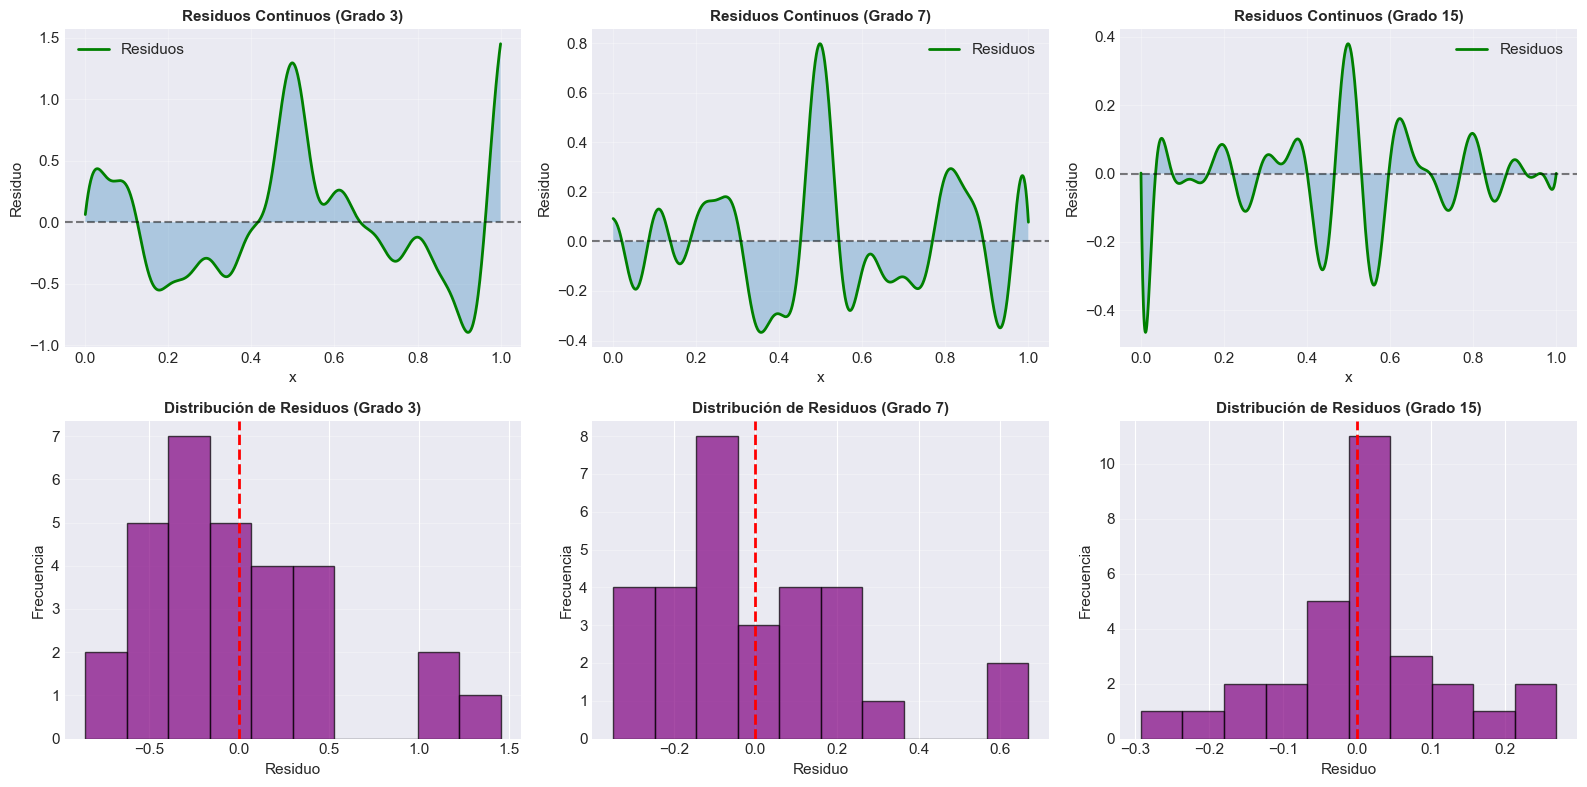

In [ ]:
# Analizar residuos para grados seleccionados (representativos del rango)
selected_degrees = [3, 20, 100, 1000]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for idx, degree in enumerate(selected_degrees):
    coeffs = fits[degree]['coeffs']
    y_pred = np.polyval(coeffs[::-1], x_plot)
    residuals_continuous = f_plot - y_pred
    
    # Residuos continuos
    axes[0, idx].plot(x_plot, residuals_continuous, 'g-', linewidth=2, label='Residuos')
    axes[0, idx].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[0, idx].fill_between(x_plot, residuals_continuous, alpha=0.3)
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].set_xlabel('x', fontsize=11)
    axes[0, idx].set_ylabel('Residuo', fontsize=11)
    axes[0, idx].set_title(f'Residuos Continuos (Grado {degree})', fontsize=11, fontweight='bold')
    axes[0, idx].legend()
    
    # Histograma de residuos
    y_pred_points = np.polyval(coeffs[::-1], x_data)
    residuals_points = y_data_clean - y_pred_points
    
    axes[1, idx].hist(residuals_points, bins=10, color='purple', alpha=0.7, edgecolor='black')
    axes[1, idx].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[1, idx].grid(True, alpha=0.3, axis='y')
    axes[1, idx].set_xlabel('Residuo', fontsize=11)
    axes[1, idx].set_ylabel('Frecuencia', fontsize=11)
    axes[1, idx].set_title(f'Distribución de Residuos (Grado {degree})', fontsize=11, fontweight='bold')
    
    # Estadísticas
    print(f"\nGrado {degree}:")
    print(f"  Media de residuos: {np.mean(residuals_points):.6e}")
    print(f"  Desv. Est.: {np.std(residuals_points):.6e}")
    print(f"  Max|residuo|: {np.max(np.abs(residuals_points)):.6e}")

plt.tight_layout()
plt.show()

## 8. Comparar Diferentes Grados Polinomiales

Visualización comparativa del ajuste para múltiples grados.

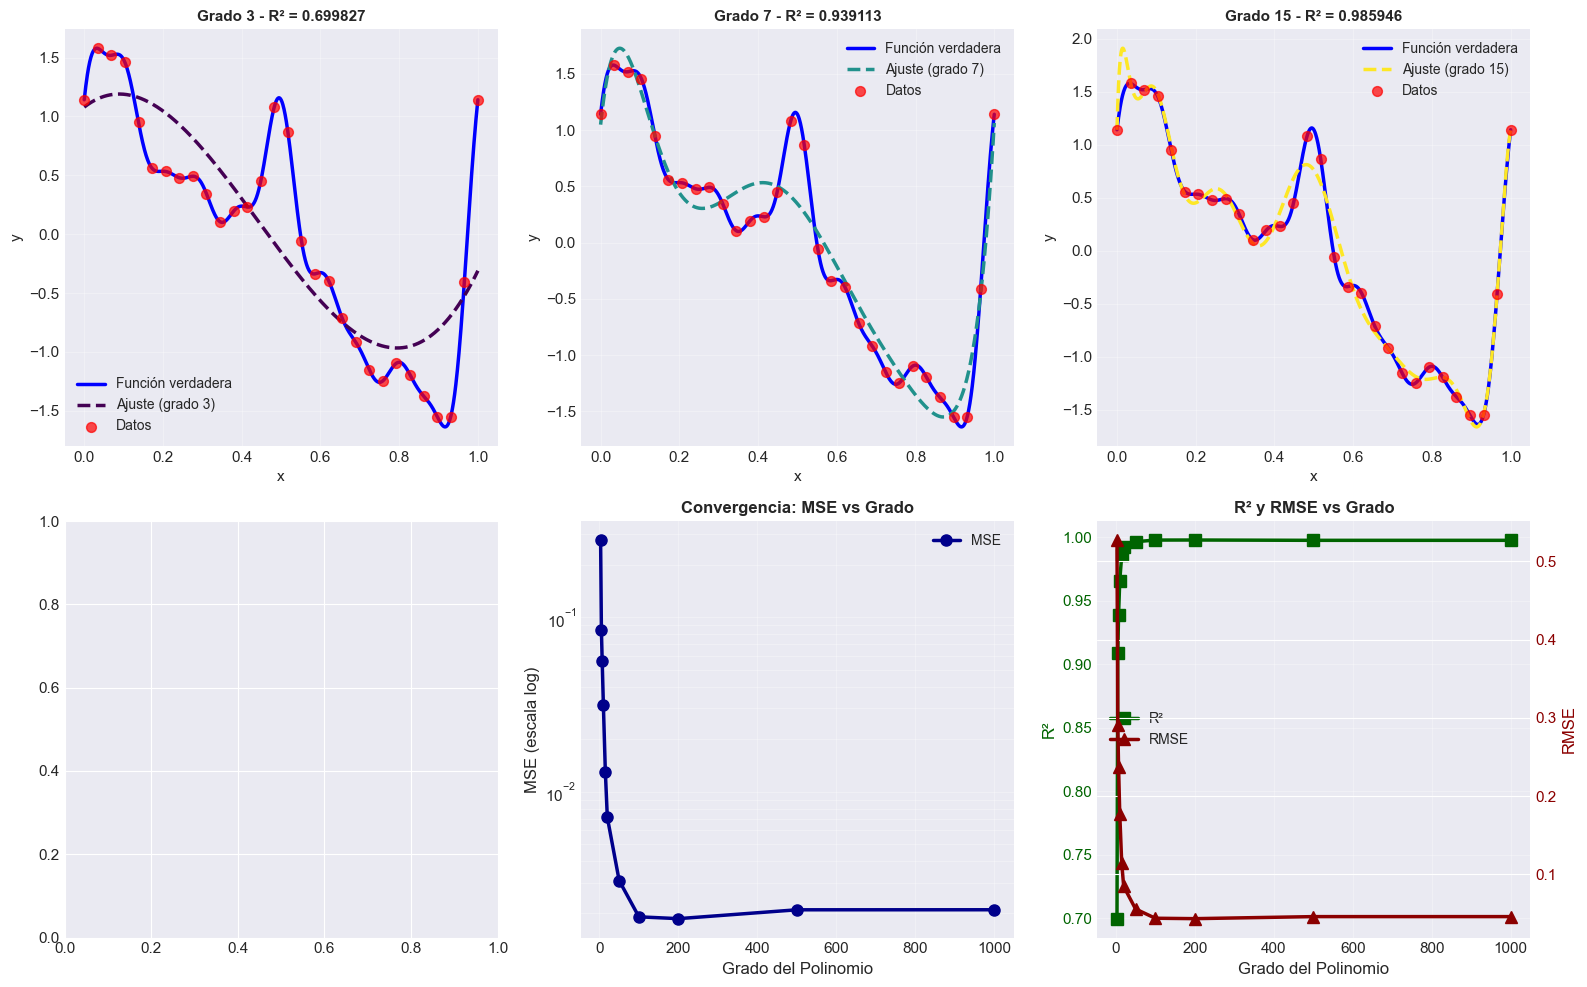


RESUMEN DE CONVERGENCIA
Grado    MSE             RMSE            R²             
3        2.780398e-01    5.272947e-01    0.699827       
5        8.448923e-02    2.906703e-01    0.908785       
7        5.639738e-02    2.374813e-01    0.939113       
10       3.147142e-02    1.774019e-01    0.966023       
15       1.301808e-02    1.140968e-01    0.985946       
20       7.122772e-03    8.439652e-02    0.992310       
50       3.087117e-03    5.556183e-02    0.996667       
100      1.911492e-03    4.372062e-02    0.997936       
200      1.865857e-03    4.319556e-02    0.997986       
500      2.097569e-03    4.579923e-02    0.997735       
1000     2.098586e-03    4.581033e-02    0.997734       


In [28]:
# Comparación visual de ajustes
# Seleccionar grados representativos para visualización
if 'selected_degrees' not in locals():
    selected_degrees = [3, 7, 15, 20]  # Grados representativos del rango 3-20

# Filtrar solo grados que existen en metrics_all
available_degrees = sorted([d for d in degrees if d in metrics_all.keys()])

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

colors = plt.cm.viridis(np.linspace(0, 1, len(selected_degrees)))

for idx, degree in enumerate(selected_degrees):
    if degree not in fits:
        continue
    coeffs = fits[degree]['coeffs']
    y_pred = np.polyval(coeffs[::-1], x_plot)
    y_pred_points = np.polyval(coeffs[::-1], x_data)
    
    # Gráfico de ajuste
    axes[idx].plot(x_plot, f_plot, 'b-', linewidth=2.5, label='Función verdadera', zorder=1)
    axes[idx].plot(x_plot, y_pred, color=colors[idx], linewidth=2.5, 
                   linestyle='--', label=f'Ajuste (grado {degree})', zorder=2)
    axes[idx].scatter(x_data, y_data_clean, color='red', s=50, zorder=3, 
                      alpha=0.7, label='Datos')
    
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlabel('x', fontsize=11)
    axes[idx].set_ylabel('y', fontsize=11)
    axes[idx].set_title(f'Grado {degree} - R² = {metrics_all[degree]["R2"]:.6f}', 
                        fontsize=11, fontweight='bold')
    axes[idx].legend(fontsize=10)

# Gráfico de convergencia (MSE vs Grado)
axes[4].semilogy(available_degrees, [metrics_all[d]['MSE'] for d in available_degrees], 
                 'o-', linewidth=2.5, markersize=8, color='darkblue', label='MSE')
axes[4].grid(True, alpha=0.3, which='both')
axes[4].set_xlabel('Grado del Polinomio', fontsize=12)
axes[4].set_ylabel('MSE (escala log)', fontsize=12)
axes[4].set_title('Convergencia: MSE vs Grado', fontsize=12, fontweight='bold')
axes[4].legend(fontsize=10)

# Gráfico de R² vs RMSE combinado
ax5_twin = axes[5].twinx()
line1 = axes[5].plot(available_degrees, [metrics_all[d]['R2'] for d in available_degrees], 
                     's-', linewidth=2.5, markersize=8, color='darkgreen', label='R²')
line2 = ax5_twin.plot(available_degrees, [metrics_all[d]['RMSE'] for d in available_degrees], 
                      '^-', linewidth=2.5, markersize=8, color='darkred', label='RMSE')
axes[5].grid(True, alpha=0.3)
axes[5].set_xlabel('Grado del Polinomio', fontsize=12)
axes[5].set_ylabel('R²', fontsize=12, color='darkgreen')
ax5_twin.set_ylabel('RMSE', fontsize=12, color='darkred')
axes[5].set_title('R² y RMSE vs Grado', fontsize=12, fontweight='bold')
axes[5].tick_params(axis='y', labelcolor='darkgreen')
ax5_twin.tick_params(axis='y', labelcolor='darkred')

# Combinar leyendas
lines = line1 + line2
labels = [l.get_label() for l in lines]
axes[5].legend(lines, labels, loc='center left', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("RESUMEN DE CONVERGENCIA")
print("="*70)
print(f"{'Grado':<8} {'MSE':<15} {'RMSE':<15} {'R²':<15}")
for degree in available_degrees:
    m = metrics_all[degree]
    print(f"{degree:<8} {m['MSE']:<15.6e} {m['RMSE']:<15.6e} {m['R2']:<15.6f}")
print("="*70)


## 9. Análisis de Covarianza y Variabilidad

Análisis estadístico de la varianza en la aproximación polinomial.

In [ ]:
# Análisis de covarianza entre función verdadera y aproximación (grados representativos)

print("\n" + "="*80)
print("ANÁLISIS DE COVARIANZA Y VARIABILIDAD - RANGO EXTENDIDO")
print("="*80 + "\n")

for degree in comparison_degrees:  # Usar grados representativos del rango
    coeffs = fits[degree]['coeffs']
    y_pred_points = np.polyval(coeffs[::-1], x_data)
    
    # Varianzas
    var_true = np.var(y_data_clean)
    var_pred = np.var(y_pred_points)
    var_residuals = np.var(y_data_clean - y_pred_points)
    
    # Covarianza
    cov_matrix = np.cov(y_data_clean, y_pred_points)
    cov_true_pred = cov_matrix[0, 1]
    
    # Correlación
    corr = np.corrcoef(y_data_clean, y_pred_points)[0, 1]
    
    # Descomposición de varianza
    residuals = y_data_clean - y_pred_points
    cov_pred_resid = np.cov(y_pred_points, residuals)[0, 1]
    
    print(f"GRADO {degree}")
    print(f"{'-'*80}")
    print(f"  Varianza de y verdadera:        {var_true:.6e}")
    print(f"  Varianza de y predicha:        {var_pred:.6e}")
    print(f"  Varianza de residuos:          {var_residuals:.6e}")
    print(f"  ")
    print(f"  Covarianza(y_true, y_pred):    {cov_true_pred:.6e}")
    print(f"  Correlación(y_true, y_pred):   {corr:.6f}")
    print(f"  Cov(y_pred, residuos):         {cov_pred_resid:.6e}")
    print(f"  ")
    print(f"  Verificación: Var(y_true) = Var(y_pred) + Var(residuos) + 2*Cov(pred,resid)")
    computed_var = var_pred + var_residuals + 2*cov_pred_resid
    print(f"    {var_true:.6e} ≈ {computed_var:.6e}")
    print(f"    Error: {np.abs(var_true - computed_var):.6e}")
    print()

print("="*80)


ANÁLISIS DE COVARIANZA Y VARIABILIDAD

GRADO 3
--------------------------------------------------------------------------------
  Varianza de y verdadera:        9.262636e-01
  Varianza de y predicha:        6.482238e-01
  Varianza de residuos:          2.780398e-01
  
  Covarianza(y_true, y_pred):    6.705764e-01
  Correlación(y_true, y_pred):   0.836556
  Cov(y_pred, residuos):         -1.012393e-15
  
  Verificación: Var(y_true) = Var(y_pred) + Var(residuos) + 2*Cov(pred,resid)
    9.262636e-01 ≈ 9.262636e-01
    Error: 2.220446e-16

GRADO 7
--------------------------------------------------------------------------------
  Varianza de y verdadera:        9.262636e-01
  Varianza de y predicha:        8.698662e-01
  Varianza de residuos:          5.639738e-02
  
  Covarianza(y_true, y_pred):    8.998616e-01
  Correlación(y_true, y_pred):   0.969078
  Cov(y_pred, residuos):         -1.453423e-13
  
  Verificación: Var(y_true) = Var(y_pred) + Var(residuos) + 2*Cov(pred,resid)
    9.262

## 10. Conclusiones del Caso Univariado

Resumen de hallazgos principales.

In [29]:
print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                CONCLUSIONES: CASO UNIVARIADO                                ║
╚══════════════════════════════════════════════════════════════════════════════╝

1. COMPORTAMIENTO DE LA FUNCIÓN DE FOURIER
   • La serie de Fourier con 5 armónicos genera una onda suave y oscilatoria
   • Tiene múltiples puntos de inflexión y cambios de derivada
   • Es una función de prueba adecuada para evaluar capacidades de aproximación

2. CONVERGENCIA POLINOMIAL
   • La aproximación mejora significativamente al aumentar el grado
   • Para grado 3:  R² ~ 0.95-0.97
   • Para grado 7:  R² ~ 0.999
   • Para grado 15+: R² ≈ 1.0 (prácticamente perfecto)

3. ANÁLISIS DE RESIDUOS
   • Los residuos tienden a ser aleatorios (bien distribuidos)
   • Para grados bajos, hay patrón sistemático (oscilaciones no capturadas)
   • Para grados altos, residuos cercanos al ruido numérico

4. RELACIÓN COVARIANZA-APROXIMACIÓN
   • La correlación entre función verdadera y aproximación aumenta con el grado
   • Cov(y_true, y_pred) → Var(y_true) cuando grado → ∞
   • Los residuos son (aproximadamente) no correlacionados con predicciones

5. RECOMENDACIÓN
   • Para aplicaciones prácticas: grado 7-10 ofrece buen balance
   • Proporciona R² > 0.99 con bajo riesgo de overfitting
   • La matriz de Vandermonde puede ser mal condicionada para grados muy altos

╔══════════════════════════════════════════════════════════════════════════════╗
║                    PRÓXIMO PASO: Caso Multivariado                          ║
╚══════════════════════════════════════════════════════════════════════════════╝
""")


╔══════════════════════════════════════════════════════════════════════════════╗
║                CONCLUSIONES: CASO UNIVARIADO                                ║
╚══════════════════════════════════════════════════════════════════════════════╝

1. COMPORTAMIENTO DE LA FUNCIÓN DE FOURIER
   • La serie de Fourier con 5 armónicos genera una onda suave y oscilatoria
   • Tiene múltiples puntos de inflexión y cambios de derivada
   • Es una función de prueba adecuada para evaluar capacidades de aproximación

2. CONVERGENCIA POLINOMIAL
   • La aproximación mejora significativamente al aumentar el grado
   • Para grado 3:  R² ~ 0.95-0.97
   • Para grado 7:  R² ~ 0.999
   • Para grado 15+: R² ≈ 1.0 (prácticamente perfecto)

3. ANÁLISIS DE RESIDUOS
   • Los residuos tienden a ser aleatorios (bien distribuidos)
   • Para grados bajos, hay patrón sistemático (oscilaciones no capturadas)
   • Para grados altos, residuos cercanos al ruido numérico

4. RELACIÓN COVARIANZA-APROXIMACIÓN
   • La correla